# Let's add a+=b

To add numbers in different registers we control increments for all $2^k$.

This is a toy example of 2+1 in 2-qubit registers.

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

from qiskit.circuit.library import XGate
cccx = XGate().control(3)
ccccx = XGate().control(4)

In [2]:
a = QuantumRegister(3, "a")
b = QuantumRegister(2, "b")
cr = ClassicalRegister(3, "res")
qc = QuantumCircuit(a, b, cr)

# a = 1, b = 3
qc.x(a[0])
qc.x(b)
qc.barrier()

# a += 1 controlled by b[0]
qc.append(cccx, [a[0], a[1], b[0], a[2]])
qc.ccx(a[0], b[0], a[1])
qc.cx(b[0], a[0])

qc.barrier()
# a += 2 controlled by b[1]
qc.ccx(a[1], b[1], a[2])
qc.cx(b[1], a[1])


qc.barrier()

qc.measure(a, cr)
display(qc.draw())

┌───┐ ░           ┌───┐ ░            ░ ┌─┐      
  a_0: ┤ X ├─░───■────■──┤ X ├─░────────────░─┤M├──────
       └───┘ ░   │  ┌─┴─┐└─┬─┘ ░      ┌───┐ ░ └╥┘┌─┐   
  a_1: ──────░───■──┤ X ├──┼───░───■──┤ X ├─░──╫─┤M├───
             ░ ┌─┴─┐└─┬─┘  │   ░ ┌─┴─┐└─┬─┘ ░  ║ └╥┘┌─┐
  a_2: ──────░─┤ X ├──┼────┼───░─┤ X ├──┼───░──╫──╫─┤M├
       ┌───┐ ░ └─┬─┘  │    │   ░ └─┬─┘  │   ░  ║  ║ └╥┘
  b_0: ┤ X ├─░───■────■────■───░───┼────┼───░──╫──╫──╫─
       ├───┤ ░                 ░   │    │   ░  ║  ║  ║ 
  b_1: ┤ X ├─░─────────────────░───■────■───░──╫──╫──╫─
       └───┘ ░                 ░            ░  ║  ║  ║ 
res: 3/════════════════════════════════════════╩══╩══╩═
                                               0  1  2

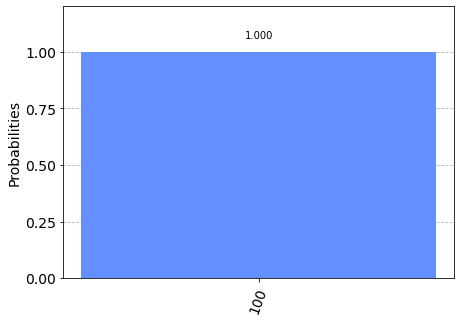

In [3]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

## Now you go

Implement $(|7\rangle+|12\rangle) += (|1\rangle + |3\rangle)$ in 2 4-qubit registers.

In [ ]:
a = QuantumRegister(4, "a")
b = QuantumRegister(4, "b")
cr = ClassicalRegister(4, "res")
qc = QuantumCircuit(a, b, cr)

############### a = 7 + 12 ########################
# |0111> + |1100> = (XII)GHZ


qc.barrier()
############### b = 1 + 3  ########################
# |0001> + |0011> =


qc.barrier()
############## a += b #############################

# a += 1 controlled by b[0]


# a += 2 controlled by b[1]


# a += 4 controlled by b[2]


# a += 8 controlled by b[3]

qc.barrier()
qc.measure(a, cr)
display(qc.draw())

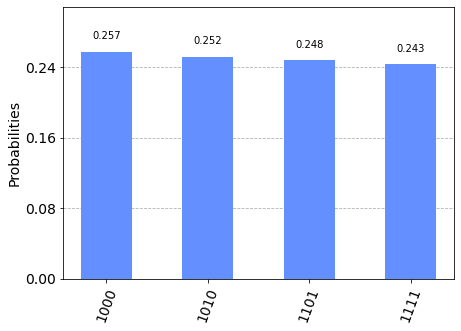

In [44]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()